# Exploratory Data Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [2]:
from pathlib import Path

# Configurable parts\
SYMBOL = "USDJPY"
MINUTES = 5
START_DATE = "20240101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_FEATURES.pkl"

## Load Data

In [3]:
df = pd.read_pickle(PROCESSED_FILE_PATH)
df.head()

,timestamp,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,...,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
929,2024-01-05 03:25:00,144.8960,144.9415,144.8940,144.9105,2.780660e+12,0.006927,0.000100,0.0145,0.000100,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
930,2024-01-05 03:30:00,144.9100,144.9490,144.9060,144.9470,2.220040e+12,0.006398,0.000252,0.0365,0.000252,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
931,2024-01-05 03:35:00,144.9465,144.9490,144.9230,144.9240,3.450710e+12,0.006930,-0.000159,-0.0230,-0.000159,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
932,2024-01-05 03:40:00,144.9245,144.9460,144.9155,144.9430,2.273510e+12,0.007072,0.000131,0.0190,0.000131,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
933,2024-01-05 03:45:00,144.9435,144.9510,144.9355,144.9465,1.925300e+12,0.006585,0.000024,0.0035,0.000024,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.set_index('timestamp')
df.head()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,...,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-05 03:25:00,144.8960,144.9415,144.8940,144.9105,2.780660e+12,0.006927,0.000100,0.0145,0.000100,2.788711,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:30:00,144.9100,144.9490,144.9060,144.9470,2.220040e+12,0.006398,0.000252,0.0365,0.000252,2.810244,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:35:00,144.9465,144.9490,144.9230,144.9240,3.450710e+12,0.006930,-0.000159,-0.0230,-0.000159,2.762497,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:40:00,144.9245,144.9460,144.9155,144.9430,2.273510e+12,0.007072,0.000131,0.0190,0.000131,2.784171,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025
2024-01-05 03:45:00,144.9435,144.9510,144.9355,144.9465,1.925300e+12,0.006585,0.000024,0.0035,0.000024,2.775585,...,5,1,0.707107,0.707107,-0.433884,-0.900969,0.848644,0.528964,0.5,0.866025


In [9]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return', 'EMA_5',
       'EMA_20', 'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120',
       'ADX_14', 'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'unix_time', 'hour',
       'dow', 'dom', 'month', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos',
       'dom_sin', 'dom_cos', 'month_sin', 'month_cos'],
      dtype='object')

## Date Integrity

In [11]:
df.info()
df.describe().T
df.isna().sum()
df.duplicated().sum()
df.index.to_series().diff().value_counts().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73782 entries, 2024-01-05 03:25:00 to 2024-12-30 23:55:00
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              73782 non-null  float64
 1   high              73782 non-null  float64
 2   low               73782 non-null  float64
 3   close             73782 non-null  float64
 4   volume            73782 non-null  float64
 5   spread            73782 non-null  float64
 6   close_pct_return  73782 non-null  float64
 7   close_return      73782 non-null  float64
 8   close_log_return  73782 non-null  float64
 9   close_fd_return   73782 non-null  float64
 10  EMA_5             73782 non-null  float64
 11  EMA_20            73782 non-null  float64
 12  EMA_50            73782 non-null  float64
 13  EMA_100           73782 non-null  float64
 14  ATRr_14           73782 non-null  float64
 15  ATRr_60           73782 non-null  float64
 16  ATRr_

timestamp
0 days 00:05:00    73716
2 days 00:05:00       46
0 days 00:10:00        7
2 days 00:10:00        4
0 days 00:15:00        4
Name: count, dtype: int64

# Plotting

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='timestamp'>

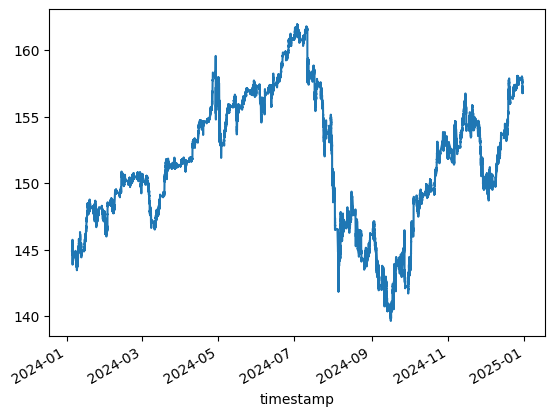

In [31]:
df['close'].plot(style='-')

<Axes: xlabel='hour', ylabel='close_fd_return'>

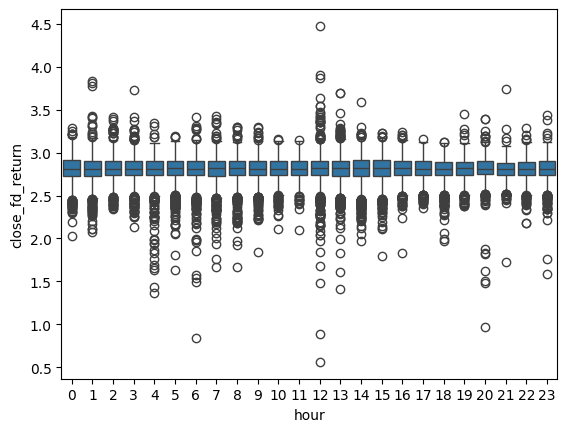

In [29]:
sns.boxplot(x="hour", y="close_fd_return", data=df)

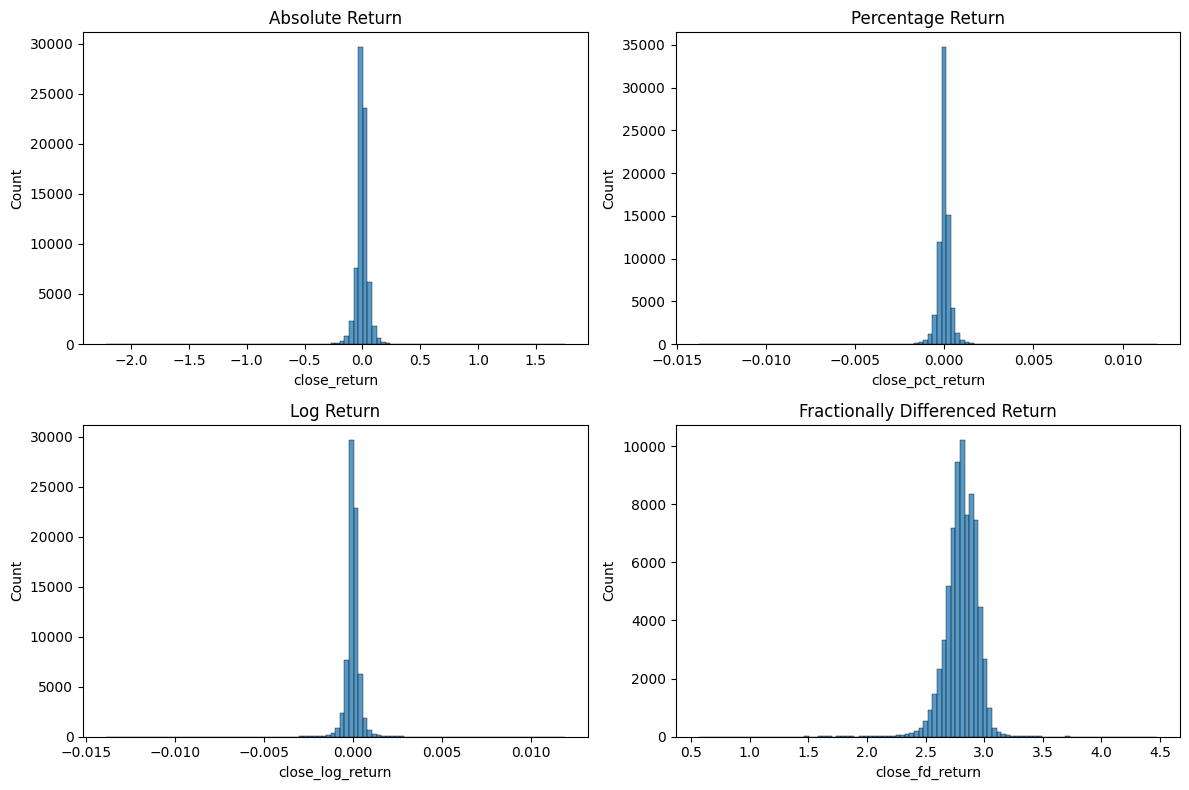

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df["close_return"], bins=100, ax=axes[0,0])
axes[0,0].set_title("Absolute Return")

sns.histplot(df["close_pct_return"], bins=100, ax=axes[0,1])
axes[0,1].set_title("Percentage Return")

sns.histplot(df["close_log_return"], bins=100, ax=axes[1,0])
axes[1,0].set_title("Log Return")

sns.histplot(df["close_fd_return"], bins=100, ax=axes[1,1])
axes[1,1].set_title("Fractionally Differenced Return")

plt.tight_layout()
plt.show()

In [7]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

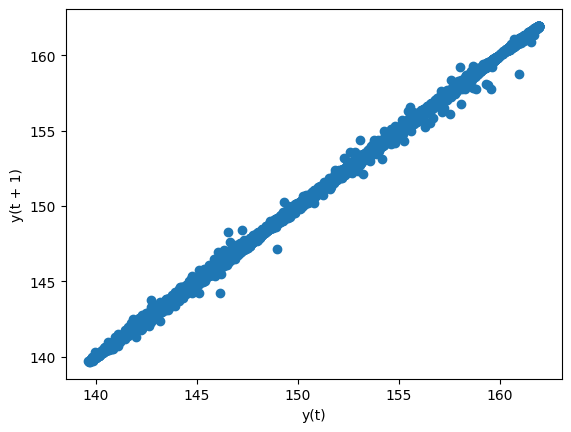

In [8]:
lag_plot(df['close'])

## Correlations

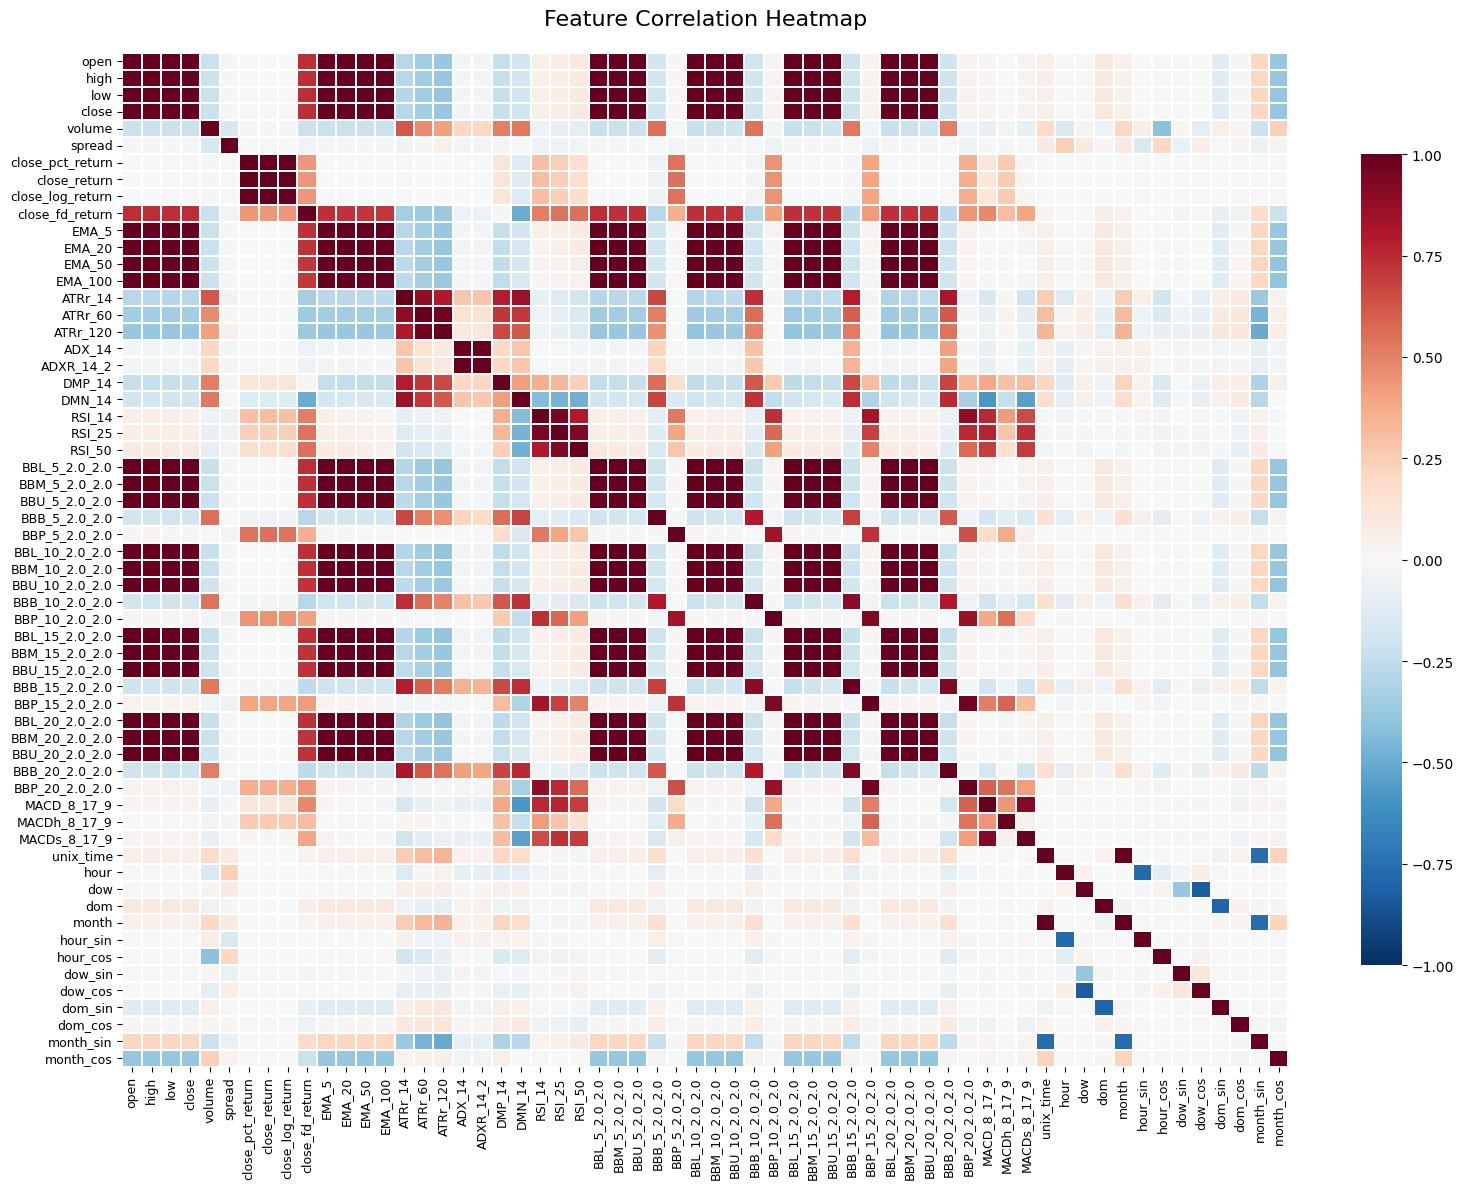

In [34]:
plt.figure(figsize=(16, 12))  # ⬅️ increase this as needed (e.g., 18x14 or 20x16)

corr = df.corr()

sns.heatmap(
    corr,
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.2,
    cbar_kws={'shrink': 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


In [35]:
selected_features = [
    # Core price dynamics
    "close", "spread",
    # Returns
    "close_log_return", "close_fd_return",
    # Trend
    "EMA_5", "EMA_50",
    # Volatility
    "ATRr_60",
    # Momentum / Strength
    "RSI_14", "ADX_14", "DMP_14", "DMN_14",
    # Bollinger band position (multi-scale)
    "BBP_5_2.0_2.0", "BBP_10_2.0_2.0", "BBP_20_2.0_2.0",
    # MACD momentum
    "MACDh_8_17_9",
    # Time cyclicality
    "hour_sin", "hour_cos", "dow_sin", "dow_cos", "month_sin", "month_cos"
]

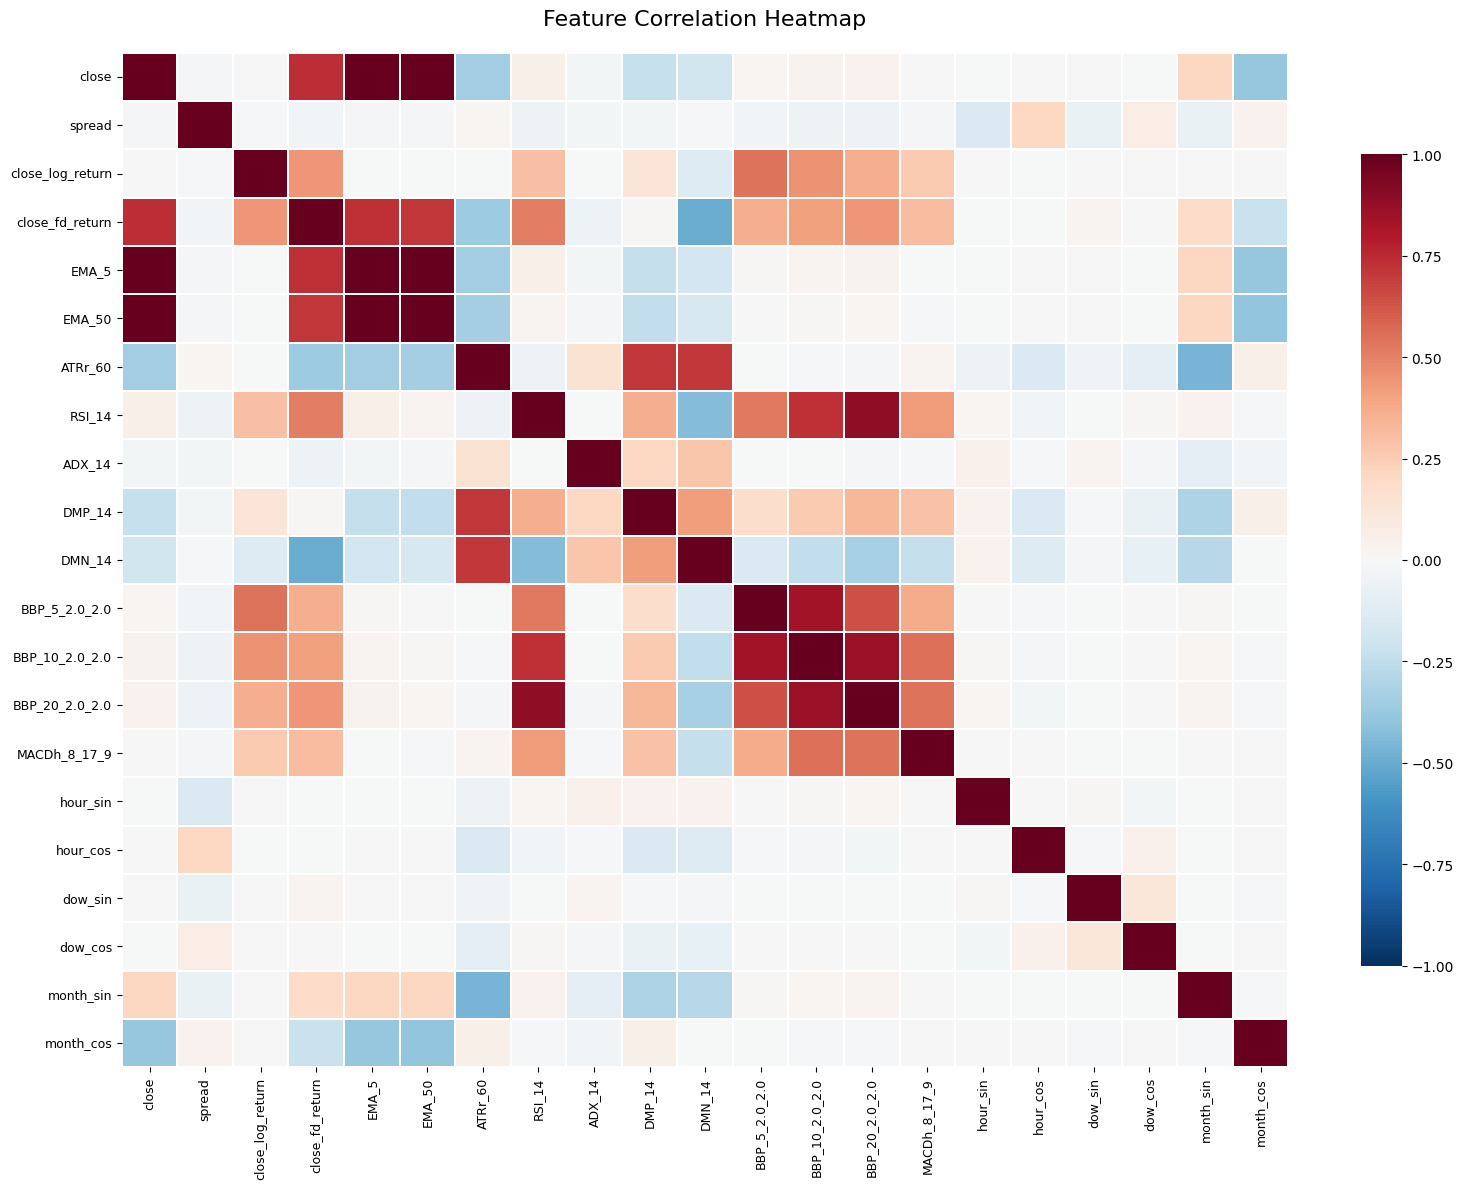

In [36]:
plt.figure(figsize=(16, 12))  # ⬅️ increase this as needed (e.g., 18x14 or 20x16)

corr = df[selected_features].corr()

sns.heatmap(
    corr,
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.2,
    cbar_kws={'shrink': 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in 

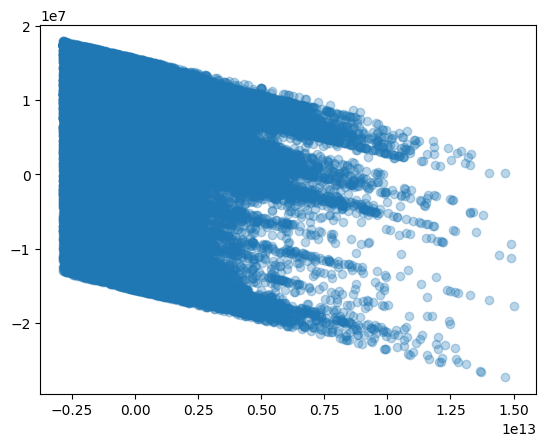

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df.select_dtypes('number').dropna()
proj = pca.fit_transform(X)
plt.scatter(proj[:,0], proj[:,1], alpha=0.3)
